# Fitting to a negative binomial distribution
-----

This is a harder challenge than fitting to normal data. A negative binomial distribution is discrete and heavy tailed, wheras a normal distribution is continuous and short-tailed. It may be necessary to transform the data before doing model fitting e.g. $y = \log(x)$.

In [137]:
%pylab inline
import sys
sys.path.append('../')

Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## load libraries

In [148]:
import importlib
import pydra
import gen_data_utils as gd
import plot_utils as pu
import seaborn as sns
import scipy.stats as stats
importlib.reload(pydra)
importlib.reload(gd)
importlib.reload(pu)

<module 'plot_utils' from '../plot_utils.py'>

## Generate negative binomial data

In [149]:
def nbin_data(m,k,data_n=1000):
    p = k/(m+k)
    n = k
    return stats.nbinom(n,p).rvs(data_n)

In [150]:
xs = nbin_data(5.,2.)
np.mean(xs)

5.0209999999999999

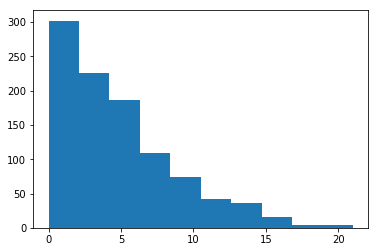

In [151]:
plt.hist(xs);

In [152]:
size = 1000
m = np.random.uniform(high=100.,low=0.1,size=size)
k = np.random.uniform(high=5.,low=0.01,size=size)

# add an epsilon term as values aren't allowed to be exactly zero.
y = nbin_data(m,k,data_n=size) +1e-10

## Plot test data

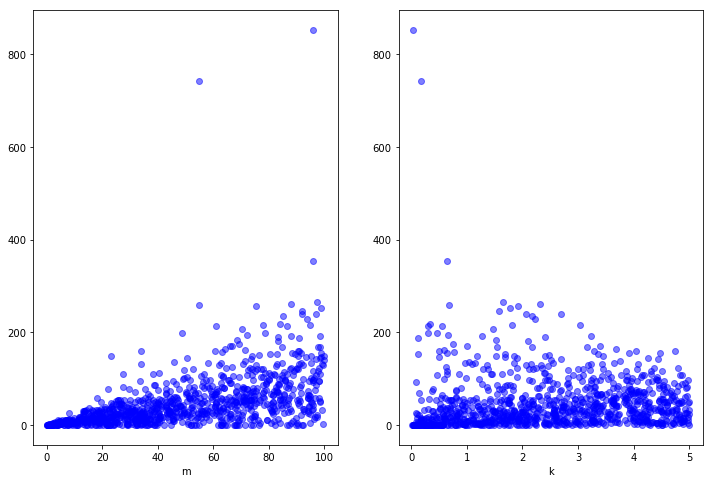

In [153]:
plt.figure(figsize=(12,8));
xs = [m,k]
x_label = ['m','k']

for i,(x,label) in enumerate(zip(xs,x_label)):
    plt.subplot(1,2,i+1);
    plt.plot(x,y,'bo',alpha=0.5);plt.xlabel(label);

## Load emulation model

In [154]:
model = pydra.Pydra(cluster_size=20,output_size=1,layers=3,input_size=2,
                       dense_layer_size=64,output_distributions=['Gamma'],print_summary=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 2)            0                                            
__________________________________________________________________________________________________
dense_61 (Dense)                (None, 64)           192         input_11[0][0]                   
__________________________________________________________________________________________________
dense_62 (Dense)                (None, 64)           4160        dense_61[0][0]                   
__________________________________________________________________________________________________
dense_63 (Dense)                (None, 64)           4160        dense_62[0][0]                   
__________________________________________________________________________________________________
dense_64 (

In [155]:
def shape_for_mdn(x):
    return x.reshape(x.size,1)
m = shape_for_mdn(m)
k = shape_for_mdn(k)
y = shape_for_mdn(y)
data = np.hstack((m,k))

In [156]:
history = model.fit(data, y, epochs=150, batch_size=50,
          verbose=1)

../error_check.py:33: UserWarning: 0.067% of values for output None below 0.001. As using the Gamma distribution for this output, this may lead to nans in training.
  format(np.mean(output<eps),i,eps,distribution)


Epoch 1/150
1000/1000 [==============================] - 1s 698us/step - loss: 4.3510
Epoch 2/150
1000/1000 [==============================] - 0s 102us/step - loss: 3.6939
Epoch 3/150
1000/1000 [==============================] - 0s 109us/step - loss: 3.5203
Epoch 4/150
1000/1000 [==============================] - 0s 118us/step - loss: 3.4607
Epoch 5/150
1000/1000 [==============================] - 0s 108us/step - loss: 3.4563
Epoch 6/150
1000/1000 [==============================] - 0s 95us/step - loss: 3.3979
Epoch 7/150
1000/1000 [==============================] - 0s 103us/step - loss: 3.3324
Epoch 8/150
1000/1000 [==============================] - 0s 98us/step - loss: 3.3301
Epoch 9/150
1000/1000 [==============================] - 0s 96us/step - loss: 3.2571
Epoch 10/150
1000/1000 [==============================] - 0s 96us/step - loss: 3.2649
Epoch 11/150
1000/1000 [==============================] - 0s 93us/step - loss: 3.2640
Epoch 12/150
1000/1000 [==============================] -

1000/1000 [==============================] - 0s 108us/step - loss: 2.8559
Epoch 96/150
1000/1000 [==============================] - 0s 112us/step - loss: 2.8151
Epoch 97/150
1000/1000 [==============================] - 0s 104us/step - loss: 2.7988
Epoch 98/150
1000/1000 [==============================] - 0s 107us/step - loss: 2.8361
Epoch 99/150
1000/1000 [==============================] - 0s 122us/step - loss: 2.8304
Epoch 100/150
1000/1000 [==============================] - 0s 109us/step - loss: 2.8929
Epoch 101/150
1000/1000 [==============================] - 0s 105us/step - loss: 2.8286
Epoch 102/150
1000/1000 [==============================] - 0s 100us/step - loss: 2.8259
Epoch 103/150
1000/1000 [==============================] - 0s 101us/step - loss: 2.7957
Epoch 104/150
1000/1000 [==============================] - 0s 100us/step - loss: 2.9381
Epoch 105/150
1000/1000 [==============================] - 0s 102us/step - loss: 2.8678
Epoch 106/150
1000/1000 [=========================

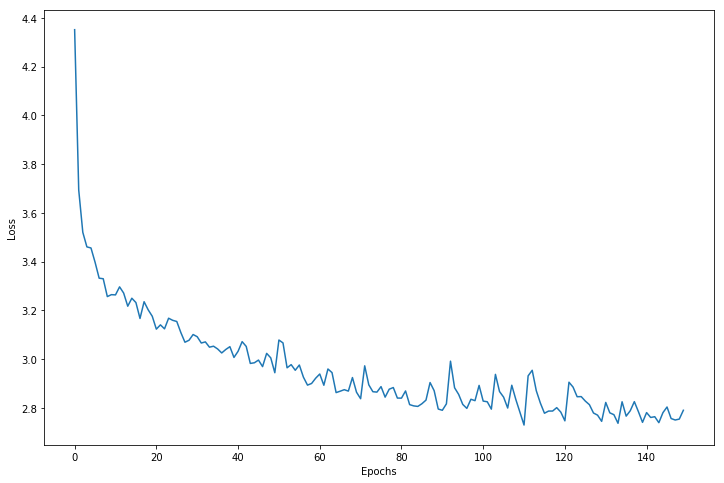

In [157]:
plt.figure(figsize=(12,8));
plt.plot(history.history['loss']);
plt.xlabel('Epochs'); plt.ylabel('Loss');

## Sample from m and k to compare samples from fitted MDN model to data

In [158]:
m_test = np.random.uniform(high=100.,low=0.1,size=size)
k_test = np.random.uniform(high=5.,low=0.01,size=size)
y_test = nbin_data(m_test,k_test,data_n=size)
m_test = shape_for_mdn(m_test)
k_test = shape_for_mdn(k_test)
y_test = shape_for_mdn(y_test)
x_test = np.hstack((m_test,k_test))

# get y-predictions.
y_pred = model.generate_mdn_sample_from_ouput(x_test)


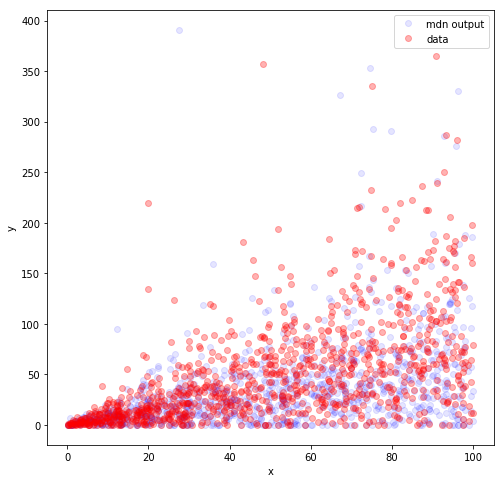

In [159]:
plt.figure(figsize=(8, 8))
plt.plot(m_test,y_pred,'bo',alpha=0.1,label='mdn output')
plt.plot(m_test,y_test,'ro',alpha=0.3,label='data')
plt.legend();plt.xlabel('x');plt.ylabel('y');

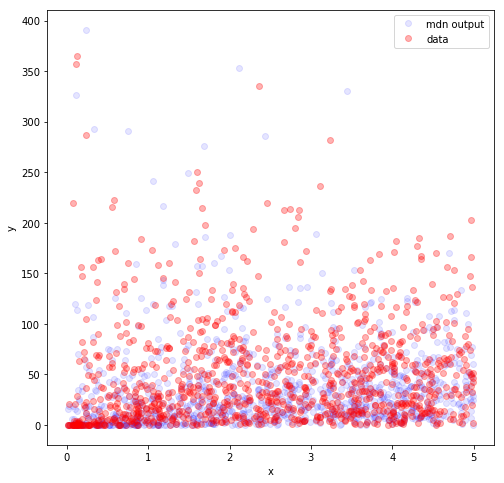

In [160]:
plt.figure(figsize=(8, 8))
plt.plot(k_test,y_pred,'bo',alpha=0.1,label='mdn output')
plt.plot(k_test,y_test,'ro',alpha=0.3,label='data')
plt.legend();plt.xlabel('x');plt.ylabel('y');

## Plot across a given axis

In [161]:
m_test = np.linspace(0.1,100.,num=1000)
k_test = 4.*np.ones(m_test.shape)

m_test = shape_for_mdn(m_test)
k_test = shape_for_mdn(k_test)

x_test = np.hstack((m_test,k_test))

output = model.predict(x_test)

## plot using plot_utils library

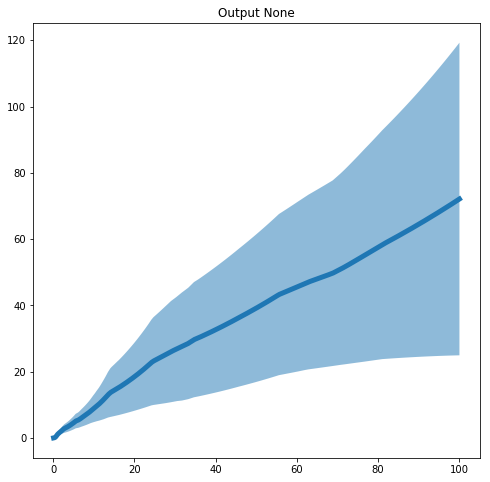

In [162]:
pu.plot_mean_and_var(output,m_test,distribution=['Gamma'])

## plot directly from Pydra class (this includes the prediction step)

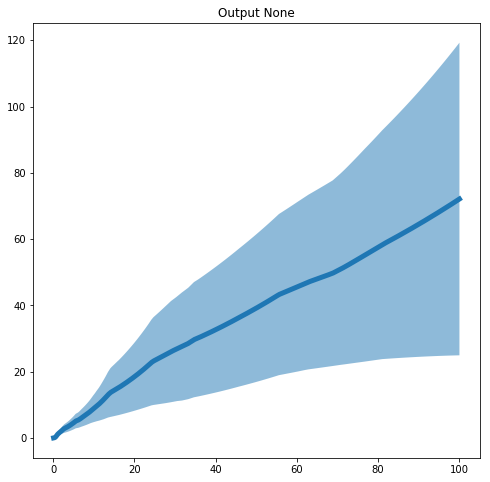

In [163]:
model.predict_plot(x_test,axis=0)